<a href="https://colab.research.google.com/github/Priths264/HACTOBERFEST2019/blob/master/Balance_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [ ]:
df = pd.read_csv('Customer Churn Data.csv')
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


In [ ]:
df.shape

(11260, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [ ]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [ ]:
df.describe()

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,25629.50000,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,3250.62635,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [ ]:
#dropping this column as insights cannot be derived from it
df.drop(['AccountID'],axis=1,inplace=True)

In [ ]:
#review categorical column for data accuracy.
#df.Churn.unique()
#df.Tenure.unique()
#df.City_Tier.unique()
#df.Payment.unique()
#df.Gender.unique()
#df.Service_Score.unique()
#df.account_segment.unique()
#df.CC_Agent_Score.unique()
#df.Marital_Status.unique()
#df.cashback.unique()
#df.Login_device.unique()

#review continuous column for data accuracy.
#df.CC_Contacted_LY.unique()
#df.Account_user_count.unique()
#df.rev_per_month.unique()
#df.Complain_ly.unique()
#df.rev_growth_yoy.unique()
#df.coupon_used_for_payment.unique()
df.Day_Since_CC_connect.unique()

array(['5', '0', '3', '7', '2', '1', '8', '6', '4', '15', nan, '11', '10',
       '9', '13', '12', '17', '16', '14', '30', '$', '46', '18', '31',
       '47'], dtype=object)

In [ ]:
#strip spaces
df.replace('(^\s+|\s+$)', '', regex=True, inplace=True)

In [ ]:
#special character replacement within string
df.Tenure = df.Tenure.str.replace('[^0-9]', '', regex=True)
df.Account_user_count = df.Account_user_count.str.replace('[^0-9]','',regex=True)
df.rev_per_month = df.rev_per_month.str.replace('[^0-9]','',regex=True)
df.rev_growth_yoy = df.rev_growth_yoy.str.replace('[^0-9]','',regex=True)
df.coupon_used_for_payment = df.coupon_used_for_payment.str.replace('[^0-9]','',regex=True)
df.Day_Since_CC_connect = df.Day_Since_CC_connect.str.replace('[^0-9]','',regex=True)
df.cashback = df.cashback.str.replace('$','')
df.Login_device = df.Login_device.str.replace('&&&&','')

#Replace empty cells with NULL
df.Tenure = df.Tenure.replace('', np.nan)
df.Account_user_count = df.Account_user_count.replace('', np.nan)
df.rev_per_month = df.rev_per_month.replace('', np.nan)
df.Login_device = df.Login_device.replace('', np.nan)
df.rev_growth_yoy = df.rev_growth_yoy.replace('', np.nan)
df.coupon_used_for_payment = df.coupon_used_for_payment.replace('', np.nan)
df.Day_Since_CC_connect = df.Day_Since_CC_connect.replace('', np.nan)
df.cashback = df.cashback.replace('', np.nan)

#Manual data correction on gender TBD
df.Gender.replace({'F':'Female','M':'Male'}, inplace=True)

In [ ]:
df.Gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [ ]:
#categorical variables
df.fillna({
    "Tenure": df.Tenure.mode()[0],
    "City_Tier": df.City_Tier.mean(),
    "CC_Contacted_LY": df.CC_Contacted_LY.mean(),
    "Payment": df.Payment.mode()[0],
    "Gender": df.Gender.mode()[0],
    "Service_Score": df.Service_Score.mean(),
    "account_segment": df.account_segment.mode()[0],
    "CC_Agent_Score": df.CC_Agent_Score.mean(),
    "Marital_Status": df.Marital_Status.mode()[0],
    "Login_device": df.Login_device.mode()[0]
    },
    inplace=True)

#continuous variables
df.fillna({
    "Account_user_count": df.Account_user_count.mode()[0],
    "rev_per_month": df.rev_per_month.mode()[0],
    "Complain_ly": df.Complain_ly.mean(),
    "rev_growth_yoy": df.rev_growth_yoy.mode()[0],
    "coupon_used_for_payment": df.coupon_used_for_payment.mode()[0],
    "Day_Since_CC_connect": df.Day_Since_CC_connect.mode()[0],
    "cashback": df.cashback.mode()[0]
}, inplace=True)

#TBD : Cashback=0, coupon_used_for_payment=0, Day_Since_CC_connect=0, CC_Agent_Score=round, CC_Contacted_LY=round

In [ ]:
df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [ ]:
#TBD
df[df==''].count()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [ ]:
#column datatype review
df.dtypes

Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [ ]:
#column type casting
df = df.astype({
    'Tenure':'float64',
    'Account_user_count':'float64',
    'rev_per_month':'float64',
    'rev_growth_yoy':'float64',
    'coupon_used_for_payment':'float64',
    'Day_Since_CC_connect':'float64',
    'cashback':'float64'
})

In [ ]:
#column datatype review
df.dtypes

Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

Text(0, 0.5, 'Frequency')

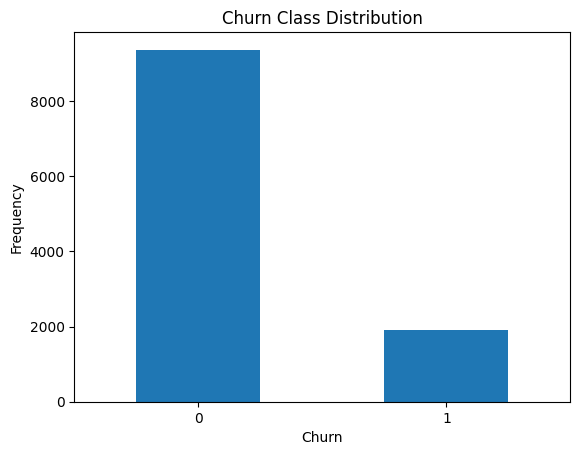

In [ ]:
#data imbalance analysis
churn_count = df.value_counts(df.Churn, sort=True)
churn_count.plot(kind='bar', rot=0)
plt.title("Churn Class Distribution")
plt.xlabel("Churn")
plt.ylabel("Frequency")

In [ ]:
#data is unbalanced as Churn data provided have a ratio of 80:20
churn_data = df[df.Churn ==1]
nochurn_data = df[df.Churn == 0]
print(churn_data.shape, nochurn_data.shape)

columns = df.columns.tolist()
columns = [c for c in columns if c not in ["Churn"]]
target = "Churn"
data_rest = df[columns]
data_churn = df[target]
print(data_rest.shape, data_churn.shape)

(1896, 18) (9364, 18)
(11260, 17) (11260,)


In [ ]:
#undersampling
#approach: get all the records with Churn=1 and take equal random samples of Churn = 0
#best fit: recommended only for large data set with millions of records
#risk: the sample of majority classes chosen would lead to biased results, not recommended for smaller dataset as given

In [ ]:
#oversampling
#approach: get all the records with Churn=1 and create equal no.of samples for each records to match the total

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

res_rest, res_churn = oversample.fit_resample(data_rest, data_churn)
print(res_rest.shape, res_churn.shape)

(18728, 17) (18728,)


In [ ]:
#oversampling technique
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#generating 70:30 ratio train test data split
X_train, X_test, y_train, y_test = train_test_split(res_rest, res_churn, test_size=0.30)

In [ ]:
#variable transformation
#encoding is ordinal data is recommended as string data would result error during classification
#recommended to perform after split to avoid data leakage (train-test contamination)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for column_name in X_train.columns:
    if X_train[column_name].dtype == object:
        X_train[column_name] = le.fit_transform(X_train[column_name])
    else:
        pass

for column_name in X_test.columns:
    if X_test[column_name].dtype == object:
        X_test[column_name] = le.fit_transform(X_test[column_name])
    else:
        pass

#TBD

In [ ]:
#model building and evaluation
classifier_tree = DecisionTreeClassifier(random_state=0)
y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_predict))

print(pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=["Predicted Negative", "Predicted Positive"],
    index=["Actual Negative", "Actual Positive"]))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2799
           1       0.96      1.00      0.98      2820

    accuracy                           0.98      5619
   macro avg       0.98      0.98      0.98      5619
weighted avg       0.98      0.98      0.98      5619

                 Predicted Negative  Predicted Positive
Actual Negative                2696                 103
Actual Positive                   1                2819


In [ ]:
#AUC Score
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_predict)
print(roc_auc)

0.9814232666681869
